In [18]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import os
import seaborn as sns

In [ ]:
import numpy as np
A = np.array([[[0, 0], [1, 1]], [[0, 0], [0, 1]], [[1, 1], [1, 1]]])

In [37]:
argument = dict()
argument['pred_dir'] =  '/workspace/data/UC1/L2_minicubes/prediction/en22/'
argument['architecture'] = ['local-rn', 'context-convlstm/']
argument['path_setting'] = 'experiments/en22/'
argument['track'] = 'iid'
argument['models'] = ['context-convlstm/baseline_convlstm_without_normalisation', 'context-convlstm/baseline_input_topo_and_NDVI', 'context-convlstm/baseline_input_topo_ndvi_weather']

# Disabling PyTorch Lightning automatic SLURM detection
for k, v in os.environ.items():
    if k.startswith("SLURM"):
        del os.environ[k]

In [39]:
def datasets_rmse(args):
    scores_models = []
    for model in args['models']:
        file = args['pred_dir']  + model + '/individual_scores.json'
        with open(file) as f:
            lst = json.load(f)

        scores_models.append([score['rmse'] for score in lst if not np.isnan(score['rmse'])])# != 'nan'])

    data = pd.DataFrame(scores_models, index=['NDVI', 'NDVI and topology', 'NDVI, topology, weather'])
    
    return scores_models



0.1462270508318325 0.12025121302386514 0.1113516291454036


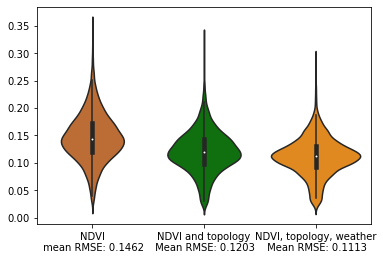

In [46]:
data = datasets_rmse(argument)
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]))
ax = sns.violinplot(data=data, palette=['chocolate', 'green', 'darkorange'])
ax.set_xticklabels(['NDVI\n mean RMSE: 0.1462','NDVI and topology\n Mean RMSE: 0.1203', 'NDVI, topology, weather\n Mean RMSE: 0.1113'])
plt.savefig('comparaison_input.png')

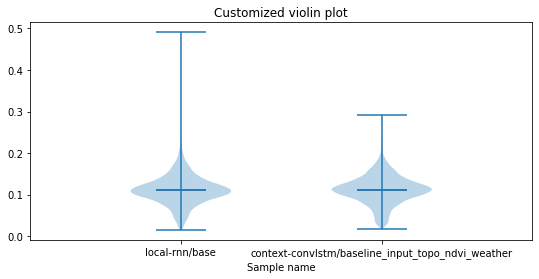

In [16]:
def adjacent_values(vals, q1, q3):
    
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
#data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
data = sorted(datasets_rmse(argument))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4)) #, sharey=True)

ax.set_title('Customized violin plot')
parts = ax.violinplot(
        data, showmeans=True, showmedians=True,
        showextrema=True)

# color 
'''for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)'''

'''quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)'''

# set style for the axes
labels = argument['models']

set_axis_style(ax, labels)

# plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

In [2]:
from pathlib import Path
path = '/workspace/data/UC1/L2_minicubes/train/'
p = Path(path).glob('**/*')
files_train = [x.name for x in p if x.is_file()]
loc_train = [x[:-11] for x in files_train]

path = '/workspace/data/UC1/L2_minicubes/test/'
p = Path(path).glob('**/*')
files_test = [x.name for x in p if x.is_file()]
loc_test = [x[:-11] for x in files_test]

path = '/workspace/data/UC1/L2_minicubes/val/'
p = Path(path).glob('**/*')
files_val = [x.name for x in p if x.is_file()]
loc_val = [x[:-11] for x in files_val]


In [3]:
total_files = list(set(files_test).union(files_train).union(files_val))
print(len(total_files))

41846


In [4]:
loc_train = list(dict.fromkeys(loc_train))
loc_test = list(dict.fromkeys(loc_test))
loc_val = list(dict.fromkeys(loc_val))

In [5]:
print(len(loc_test))
print(len(list(set(loc_test).intersection(loc_train))))

6995
6236


In [6]:
import random
total = list(set(loc_test).union(loc_train).union(loc_val))
random.shuffle(total)
print(len(total))
train = total[:int(len(total)*0.75)]
test = total[int(len(total)*0.75):int(len(total)*0.95)]
val = total[int(len(total)*0.95):]

print(set(test).intersection(train).intersection(val))
print(len(train), len(test), len(val))
print(len(val) + len(train) + len(test), len(total))

16687
set()
12515 3337 835
16687 16687


In [7]:
train_set = [x for j in train for x in total_files if j in x] 
test_set = [x for j in test for x in total_files if j in x] 
val_set = [x for j in val for x in total_files if j in x] 


In [8]:
print(len(train_set), len(test_set), len(val_set))
print(len(train_set) + len(test_set) + len(val_set), len(total_files))
print(set(test_set).intersection(train_set).intersection(val_set))

31361 8369 2116
41846 41846
set()


In [22]:
import os
import shutil

path = "/workspace/data/UC1/L2_minicubes_loc_iid/"
path_old = "/workspace/data/UC1/L2_minicubes/"
dest = "train/"
loc = loc_train
dataset = train_set

for fold in loc:
    if not os.path.exists(path + dest + fold[:5]):
        os.makedirs(path + dest + fold[:5])
   
for file in dataset:
    print(file)
    folder = file[:5] + '/'
    origin = "train/" if file in files_train else ("test/" if file in files_test else "val/")
    shutil.copy(path_old + origin + folder + file, path + dest + folder)

35JMK2421_2018-12.nc
35JMK2421_2020-03.nc
35JMK2421_2017-09.nc
37PDP2318_2017-12.nc
37PDP2318_2019-03.nc
29SPS2208_2018-09.nc
29SPS2208_2017-06.nc
29SPS2208_2019-12.nc
29RQQ1401_2019-03.nc
29RQQ1401_2017-12.nc
37PDK1408_2020-03.nc
37PDK1408_2017-09.nc
37PDK1408_2018-12.nc
34HCH1716_2017-09.nc
34HCH1716_2018-12.nc
34HCH1716_2020-03.nc
37NFJ0400_2018-12.nc
37NFJ0400_2017-09.nc
37NFJ0400_2020-03.nc
34HCH1022_2019-03.nc
34HCH1022_2017-12.nc
35NRA2502_2017-12.nc
35NRA2502_2019-03.nc
37MBV1113_2019-03.nc
37MBV1113_2017-12.nc
36MYD2312_2017-12.nc
36MYD2312_2019-03.nc
28PCV0418_2017-09.nc
28PCV0418_2018-12.nc
28PCV0418_2020-03.nc
37PDK0114_2017-12.nc
37PDK0114_2019-03.nc
37MBV2215_2018-12.nc
37MBV2215_2017-09.nc
37MBV2215_2020-03.nc
29RQQ1102_2017-06.nc
29RQQ1102_2018-09.nc
29RQQ1102_2019-12.nc
29SPS0305_2019-06.nc
29SPS0305_2018-03.nc
34HCH1423_2018-03.nc
34HCH1423_2019-06.nc
31SFV0310_2017-06.nc
31SFV0310_2018-09.nc
31SFV0310_2019-12.nc
37MFT2305_2017-12.nc
37MFT2305_2019-03.nc
38KRF1401_201